## Setup

In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize

import Bargaining as brg
import bargaining_algorithm as ba
from figures import *
from checks import *

import numpy as np
import numba as nb
import scipy.optimize as optimize
import copy

from EconModel import EconModelClass
from consav.grids import nonlinspace
from consav import linear_interp, linear_interp_1d
from consav import quadrature

#plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})

# c++ settings
do_cpp = True
do_compile = True
threads = 16

# Load and save settings
load_model1 = False
load_model2 = False
save_model1 = True
save_model2 = True

Compile C++ files

In [2]:
# compile c++ files
if do_cpp & do_compile:
    model = brg.HouseholdModelClass(par={'do_cpp':do_cpp,'num_Ctot':100})
    model.link_to_cpp(force_compile=do_compile)

### Model 1

User settings

In [3]:
# Set name 
name        = 'model 4 cpp preC'
latexname   = ''

# Set parameters
par1        = {
              'T':10,
              'div_A_share':0.3,
              'sigma_love':0.0,
              
              'do_cpp': False,
              'threads':threads,
              'brg_algo':0,
              
              'cpp_intraperiod_consumption':True,
              }

Setup model1

In [4]:
# Setup model
if load_model1:
    model1 = brg.HouseholdModelClass(name=name, load=True)
    for key in par1.keys():
        par1[key] = getattr(model1.par,key)
else:
    model1 = brg.HouseholdModelClass(name=name, par=par1)
    
model1.link_to_cpp(force_compile=False)
model1.spec = {'latexname':latexname,'par':par1}

In [6]:
# model1.cpp.delink()
# model1.link_to_cpp(force_compile=do_compile)

Model 2

User settings

In [7]:
# Set name 
name        = 'model 4 cpp'
latexname   = ''

# Set parameters
par_changes = {
              'cpp_value_of_choice_couple':True,
              }

Setup model2

In [8]:
# Create par2
par2 = copy.deepcopy(par1)
for key in par_changes.keys():
    par2[key] = par_changes[key]
    
# Setup model
if load_model2:
    model2 = brg.HouseholdModelClass(name=name, load=True)
    for key in par2.keys():
        par2[key] = getattr(model2.par,key)
else:
    model2 = brg.HouseholdModelClass(name=name, par=par2)

model2.link_to_cpp(force_compile=False)
model2.spec = {'latexname':latexname,'par':par2}

### Summary

In [9]:
column1_length = 16
column2_length = 16
column3_length = 16

print(f"{' '*column1_length}|{model1.name.center(column2_length)}|{model2.name.center(column3_length)}|")
print("-"*(column1_length+column2_length+column3_length+3))
for key in [p for p in par1.keys() if p not in par_changes.keys()]:
    print(f"{key.ljust(column1_length)}|{str(par1[key]).center(column2_length)}|{str(par2[key]).center(column3_length)}|")
print("-"*(column1_length+column2_length+column3_length+3))
for key in par_changes.keys():
    print(f"{key.ljust(column1_length)}|{str(par1[key]).center(column2_length)}|{str(par2[key]).center(column3_length)}|")

                |model 4 cpp preC|  model 4 cpp   |
---------------------------------------------------
T               |       10       |       10       |
div_A_share     |      0.3       |      0.3       |
sigma_love      |      0.0       |      0.0       |
threads         |       16       |       16       |
brg_algo        |       0        |       0        |
cpp_intraperiod_consumption|      True      |      True      |
---------------------------------------------------
do_cpp          |     False      |      True      |


### Solve models

Solve model1

In [19]:
# C_tot = 1.0
# t = 8
# M_resources = 2.0
# iL = 10
# iP = 10
# power = model1.par.grid_power[iP]
# Vw_next = model1.sol.Vw_couple[t+1,iP]
# Vm_next = model1.sol.Vm_couple[t+1,iP]
# obj1 = model1.value_of_choice_couple(C_tot,t,M_resources,iL,iP,power,Vw_next,Vm_next)
# obj2 = model1.value_of_choice_couple_cpp(C_tot,t,M_resources,iL,iP,Vw_next,Vm_next)



In [23]:
# for i,j in zip(obj1,obj2):
#     print(i,j)

-1.628054288228506 -1.628054288228506
0.22839319012341008 [0.22839319]
0.22839318382750706 [0.22839318]
0.5432136260490829 [0.54321363]
-1.6421194479062167 [-1.64211945]
-1.6139891285507955 [-1.61398913]


In [41]:
# Cw = np.array(1.0).reshape(-1,1)
# Cm = np.array((1.0)).reshape(-1,1)
# Cp = np.array((1.0)).reshape(-1,1)
# Ct = np.array((1.0)).reshape(-1,1)
# p = np.array(0.5)

# Cw_test = np.array([Cw[0,0]])
# Cm_test = np.array([Cm[0,0]])
# Cp_test = np.array([Cp[0,0]])

# model1.cpp.solve_intraperiod_couple(Cw_test,Cm_test,Cp_test, Ct, p, model1.par)

# print(Cw_test)
# print(Cm)
# print(Cp)

# x = 2
# x = 2 + x

[0.22839319]
[[1.]]
[[1.]]


In [18]:
if load_model1==False:
    model1.solve()
if save_model1:
    model1.save()

Solve model2

In [53]:
if load_model2==False:
    model2.solve()
if save_model2:
    model2.save()

## Calculate differences in the solutions

Absolute differences

In [54]:
sol_max_abs_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=False)
print_namespace(sol_max_abs_diff)

Vw_single: 1.3104285656595493e-08
Vm_single: 3.2822291551326543e-08
Cw_priv_single: 0.00011539274131022736
Cm_priv_single: 0.0004908678610571204
Cw_pub_single: 0.00011539274131022736
Cm_pub_single: 0.0004908678610571204
Cw_tot_single: 0.00023078548262045473
Cm_tot_single: 0.0009817357221142409
Vw_trans_single: 1.3104285656595493e-08
Vm_trans_single: 3.2822291551326543e-08
Cw_priv_trans_single: 0.00011539274131022736
Cm_priv_trans_single: 0.0004908678610571204
Cw_pub_trans_single: 0.00011539274131022736
Cm_pub_trans_single: 0.0004908678610571204
Cw_tot_trans_single: 0.00023078548262045473
Cm_tot_trans_single: 0.0009817357221142409
Vw_couple: 0.0004548669867219246
Vm_couple: 0.0005269145141646447
Cw_priv_couple: 0.03870799537314129
Cm_priv_couple: 0.045206882107292845
C_pub_couple: 0.05755416627330234
C_tot_couple: 0.10636186733512432
Vw_remain_couple: 0.002998522959141603
Vm_remain_couple: 0.001742636545623455
Cw_priv_remain_couple: 0.0562876598709352
Cm_priv_remain_couple: 0.0480814406

Relative differences

In [48]:
sol_max_rel_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=True)
print_namespace(sol_max_rel_diff)

Vw_single: 0.0
Vm_single: 0.0
Cw_priv_single: 0.0
Cm_priv_single: 0.0
Cw_pub_single: 0.0
Cm_pub_single: 0.0
Cw_tot_single: 0.0
Cm_tot_single: 0.0
Vw_trans_single: 0.0
Vm_trans_single: 0.0
Cw_priv_trans_single: 0.0
Cm_priv_trans_single: 0.0
Cw_pub_trans_single: 0.0
Cm_pub_trans_single: 0.0
Cw_tot_trans_single: 0.0
Cm_tot_trans_single: 0.0
Vw_couple: 96490.23932674224
Vm_couple: 3106845.9900993663
Cw_priv_couple: 0.08766651881112278
Cm_priv_couple: 0.3467626114740251
C_pub_couple: 0.023811824010166932
C_tot_couple: 0.023811937900796283
Vw_remain_couple: 96490.23932674224
Vm_remain_couple: 3106845.9900993663
Cw_priv_remain_couple: 0.02399015071109326
Cm_priv_remain_couple: 0.02399000266591944
C_pub_remain_couple: 0.023811824010166932
C_tot_remain_couple: 0.023811937900796283
power_idx: 0.0625
power: 0.08754023897258699
savings_vec: 3.906779069212605e-07
Vw_plus_vec: 1.7544312304150237e-08
Vm_plus_vec: 0.0005453036330680648
marg_V_couple: nan
marg_V_remain_couple: nan
EmargU_pd: nan
C_tot_

In [49]:
sol_max_rel_diff_index = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)
print_namespace(sol_max_rel_diff_index)

Vw_single: (0, 0)
Vm_single: (0, 0)
Cw_priv_single: (0, 0)
Cm_priv_single: (0, 0)
Cw_pub_single: (0, 0)
Cm_pub_single: (0, 0)
Cw_tot_single: (0, 0)
Cm_tot_single: (0, 0)
Vw_trans_single: (0, 0)
Vm_trans_single: (0, 0)
Cw_priv_trans_single: (0, 0)
Cm_priv_trans_single: (0, 0)
Cw_pub_trans_single: (0, 0)
Cm_pub_trans_single: (0, 0)
Cw_tot_trans_single: (0, 0)
Cm_tot_trans_single: (0, 0)
Vw_couple: (0, 0, 39, 49)
Vm_couple: (0, 20, 39, 49)
Cw_priv_couple: (1, 12, 20, 49)
Cm_priv_couple: (1, 6, 20, 49)
C_pub_couple: (1, 10, 20, 49)
C_tot_couple: (1, 6, 20, 49)
Vw_remain_couple: (3, 1, 21, 12)
Vm_remain_couple: (4, 16, 1, 21)
Cw_priv_remain_couple: (1, 18, 20, 49)
Cm_priv_remain_couple: (1, 6, 20, 49)
C_pub_remain_couple: (1, 10, 20, 49)
C_tot_remain_couple: (1, 6, 20, 49)
power_idx: (0, 17, 21, 3)
power: (0, 14, 20, 20)
savings_vec: (0,)
Vw_plus_vec: (0,)
Vm_plus_vec: (0,)
marg_V_couple: (0, 0, 0, 0)
marg_V_remain_couple: (0, 0, 0, 0)
EmargU_pd: (0, 0, 0)
C_tot_pd: (0, 0, 0)
M_pd: (0, 0, 0

## Plot the differences

Specify the variable that index of maximum absolute difference should be based on

In [38]:
variable = 'Vw_couple'

Find index with largest difference

In [39]:
sol_max_abs_diff_idx = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)

In [40]:
idx = getattr(sol_max_abs_diff_idx,variable)

(t,iP,iL,iA) = idx
print(f't = {t}, iP = {iP}, iL = {iL}, iA = {iA}')

t = 2, iP = 1, iL = 22, iA = 22


### Bargaining power

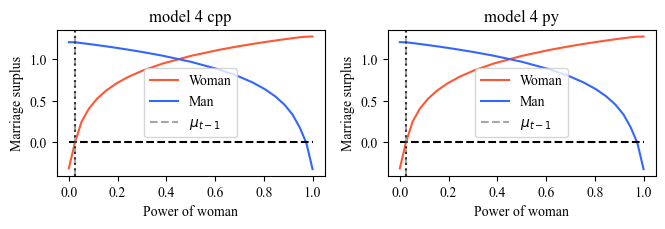

In [41]:
model_plot([model1,model2],plot_surplus,t,iP,iL,iA, subtitles=[model1.name,model2.name])

### Values

Plot female values

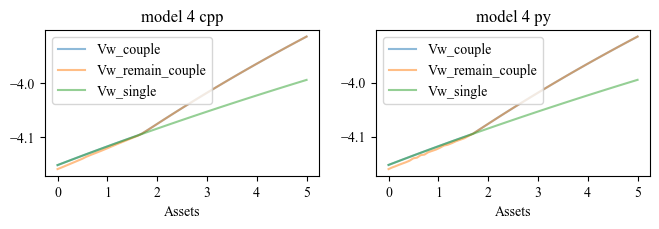

In [42]:
model_plot([model1,model2], plot_var_over_assets, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

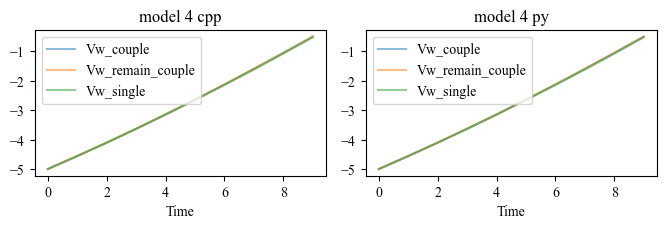

In [43]:
model_plot([model1,model2], plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, subtitles=[model1.name, model2.name ])

Plot male values

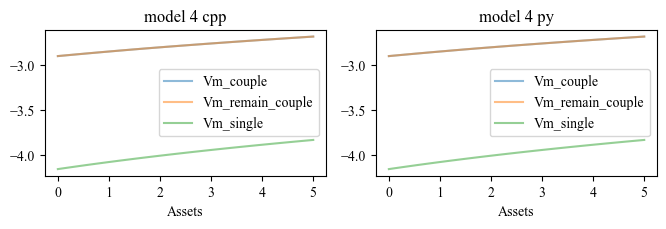

In [44]:
model_plot([model1,model2], plot_var_over_assets, ['Vm_couple','Vm_remain_couple','Vm_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

### Consumption

Plot female consumption

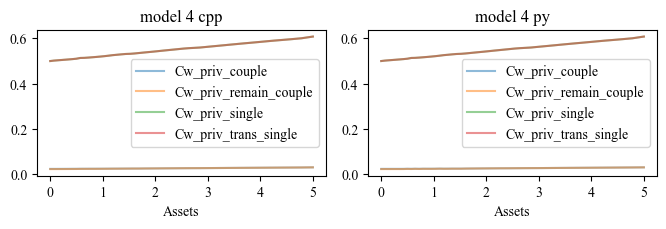

In [45]:
model_plot([model1,model2], plot_var_over_assets, ['Cw_priv_couple','Cw_priv_remain_couple','Cw_priv_single', 'Cw_priv_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot male consumption

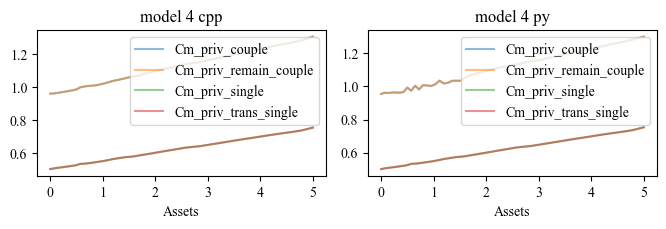

In [46]:
model_plot([model1,model2], plot_var_over_assets, ['Cm_priv_couple','Cm_priv_remain_couple','Cm_priv_single', 'Cm_priv_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot public consumption

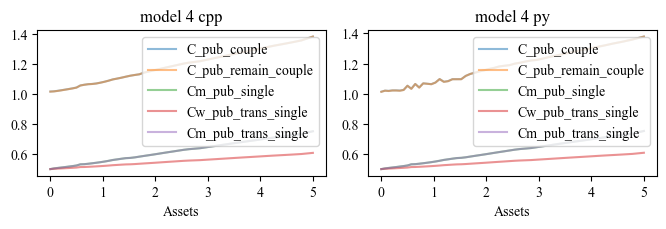

In [47]:
model_plot([model1,model2], plot_var_over_assets, ['C_pub_couple','C_pub_remain_couple','Cm_pub_single', 'Cw_pub_trans_single', 'Cm_pub_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

## Plots of difference

In [48]:
model_diff =  brg.HouseholdModelClass(name='Model differences')
model_diff.par = model1.par
model_diff.sol = difference_in_namespace(model1.sol, model2.sol)

Plot value

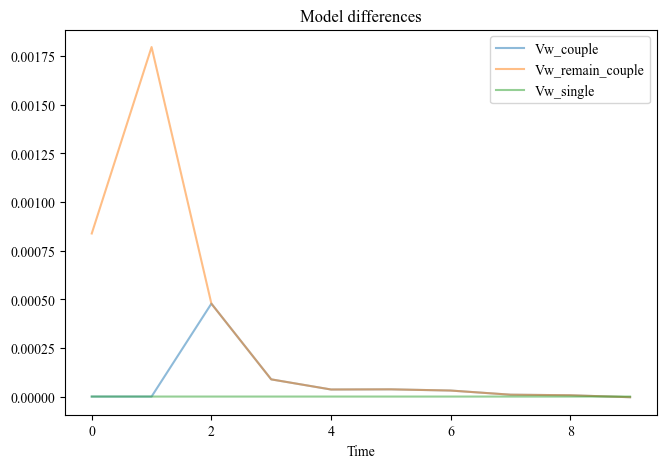

In [49]:
model_plot([model_diff], plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, subtitles=[model_diff.name])

Plot consumption

Text(0.5, 0.5, 'Ctot')

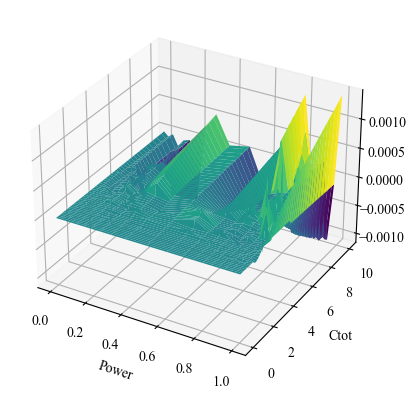

In [59]:
# plot pre_Ctot_Cw_priv in a 3 dimensional plot with using meshgrids 
fig = plt.figure()
ax = plt.axes(projection='3d')
mesh1, mesh2 = np.meshgrid(model1.par.grid_power, model1.par.grid_Ctot, indexing='ij')

ax.plot_surface(mesh1,mesh2, model_diff.sol.pre_Ctot_Cw_priv, cmap='viridis', edgecolor='none')

# label axes
ax.set_xlabel('Power')
ax.set_ylabel('Ctot')
